In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [2]:
df_train = pd.read_csv('/Users/angelali/Desktop/Kaggle projects/disaster tweet prediction/train.csv')
df_test = pd.read_csv('/Users/angelali/Desktop/Kaggle projects/test.csv', encoding ='latin1')

print('the numbers of datapoints in training set: {}'.format(len(df_train)))
print('the numbers of features in training set: {}'.format(len(df_train.columns)))
print('the numbers of datapoints in test set: {}'.format(len(df_test)))
print('the numbers of features test set: {}'.format(len(df_test.columns)))

the numbers of datapoints in training set: 7613
the numbers of features in training set: 5
the numbers of datapoints in test set: 3263
the numbers of features test set: 4


In [3]:
df_train.head(1)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   

   target  
0       1

In [4]:
df_train.drop('id', axis=1, inplace = True)
df_train.head()

keyword location                                               text  target
0     NaN      NaN  Our Deeds are the Reason of this #earthquake M...       1
1     NaN      NaN             Forest fire near La Ronge Sask. Canada       1
2     NaN      NaN  All residents asked to 'shelter in place' are ...       1
3     NaN      NaN  13,000 people receive #wildfires evacuation or...       1
4     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...       1

In [5]:
df_test.head()

keyword location                                               text  target
0     NaN      NaN                 Just happened a terrible car crash       1
1     NaN      NaN  Heard about #earthquake is different cities, s...       1
2     NaN      NaN  there is a forest fire at spot pond, geese are...       1
3     NaN      NaN           Apocalypse lighting. #Spokane #wildfires       1
4     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan       1

# look at the target variable in training data set

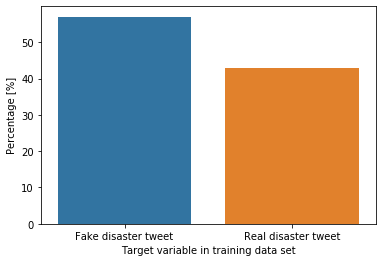

In [6]:
target_counts = df_train['target'].value_counts().div(len(df_train)).mul(100) # calculating percentages of target values

ax = sns.barplot(target_counts.index, target_counts.values)
ax.set_xlabel('Target variable in training data set')
ax.set_ylabel('Percentage [%]')
ax.set_xticklabels(['Fake disaster tweet','Real disaster tweet'])
plt.show()

So this dataset is Not unbalanced

# Check the percentage of missing values in'Location' and 'Keyword' columns

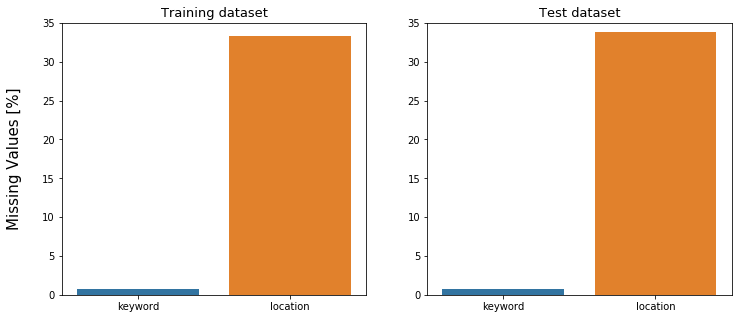

In [7]:
missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

train_nans = df_train[missing_cols].isnull().sum()/len(df_train)*100
test_nans = df_test[missing_cols].isnull().sum()/len(df_test)*100

sns.barplot(x=train_nans.index, y=train_nans.values, ax=axes[0])
sns.barplot(x=test_nans.index, y=test_nans.values, ax=axes[1])

axes[0].set_ylabel('Missing Values [%]', size=15, labelpad=20)
axes[0].set_yticks(np.arange(0,40,5))
axes[0].set_ylim((0,35))
axes[1].set_yticks(np.arange(0,40,5))
axes[1].set_ylim((0,35))

axes[0].set_title('Training dataset', fontsize=13)
axes[1].set_title('Test dataset', fontsize=13)
plt.show()

# Looking into 'keyword' columns

In [8]:
# count the distinct keywords
dist_keyword=df_train['keyword'].value_counts()
print(dist_keyword.head(30))

#visualize keywords
import plotly.express as px
scatter = px.scatter(dist_keyword, x=dist_keyword.values, y=dist_keyword.index,size=dist_keyword.values)
scatter.show()

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
windstorm      40
collided       40
fear           40
twister        40
siren          40
evacuate       40
outbreak       40
hellfire       39
sunk           39
whirlwind      39
derailment     39
famine         39
explosion      39
weapons        39
wreckage       39
sinkhole       39
earthquake     39
wrecked        39
flames         39
collision      39
weapon         39
hurricane      38
drowned        38
Name: keyword, dtype: int64


# Check the top 30 important keywods from the REAL disaster tweets and their true ratio

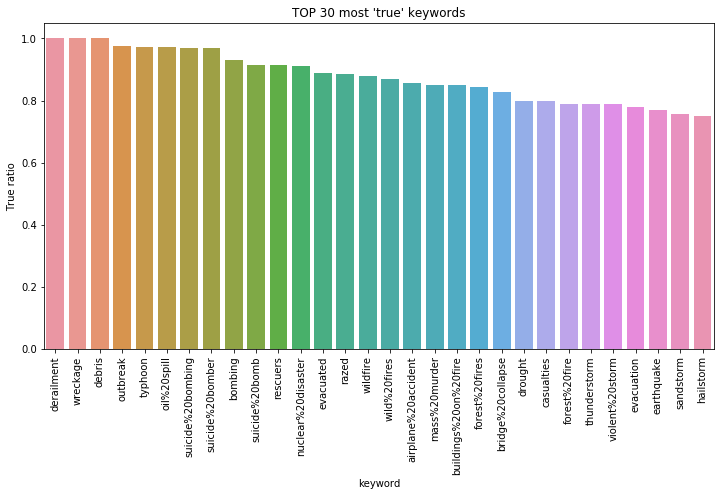

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
true_ratios = df_train.groupby('keyword')['target'].mean().sort_values(ascending=False)
sns.barplot(x=true_ratios.index[:30], y=true_ratios.values[:30], ax=ax)
plt.xticks(rotation=90)
plt.title("TOP 30 most 'true' keywords")
plt.ylabel("True ratio")
plt.show()

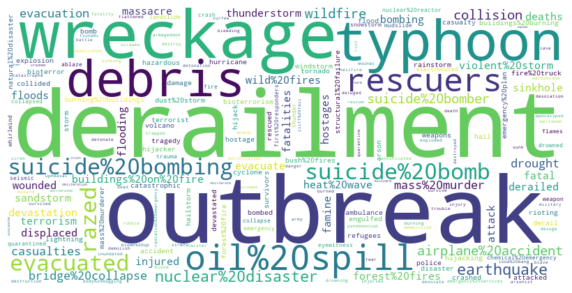

In [10]:
disaster_tweet = dict(df_train[df_train['target']==1]['keyword'].value_counts())

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").generate_from_frequencies(disaster_tweet)

plt.figure(figsize=[10,6])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Check the top 30 important keywods from the FAKE disaster tweets and their true ratio

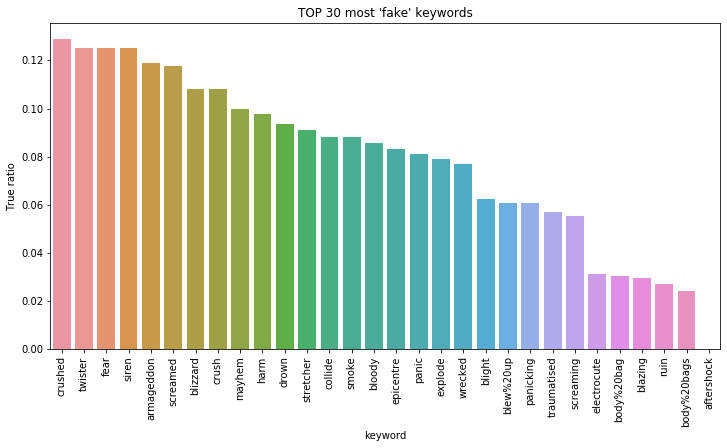

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
true_ratios = df_train.groupby('keyword')['target'].mean().sort_values(ascending=False)
sns.barplot(x=true_ratios.index[-30:], y=true_ratios.values[-30:], ax=ax)
plt.xticks(rotation=90)
plt.title("TOP 30 most 'fake' keywords")
plt.ylabel("True ratio")
plt.show()

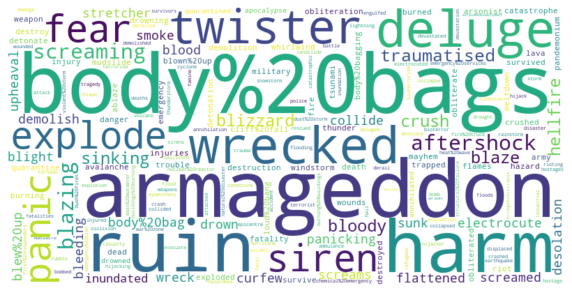

In [12]:
nondisaster_tweet = dict(df_train[df_train['target']==0]['keyword'].value_counts())

wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").generate_from_frequencies(nondisaster_tweet)

plt.figure(figsize=[10,6])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Text data preprocessing 

In [13]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /Users/angelali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/angelali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/angelali/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/angelali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
# created functions to remove url, html, emoji from text data
import re

def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



# created puntucation removal function
import string
def remove_punc(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)


# created a stopword filter function
stop_words=set(stopwords.words("english"))
def stopword_filter(sentence):
    filtered_sentence=[]
    for word in sentence:
        if word not in stop_words:
            filtered_sentence.append(word)
    return filtered_sentence  

In [15]:
# Dealing with slange
# https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt
slang_abbrev_dict = {
    'AFAIK': 'As Far As I Know',
    'AFK': 'Away From Keyboard',
    'ASAP': 'As Soon As Possible',
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'BRB': 'Be Right Back',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'B4': 'Before',
    'B4N': 'Bye For Now',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FAQ': 'Frequently Asked Questions',
    'FC': 'Fingers Crossed',
    'FWIW': 'For What It\'s Worth',
    'FYI': 'For Your Information',
    'GAL': 'Get A Life',
    'GG': 'Good Game',
    'GN': 'Good Night',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek you',
    'ILU': 'I Love You',
    'IMHO': 'In My Humble Opinion',
    'IMO': 'In My Opinion',
    'IOW': 'In Other Words',
    'IRL': 'In Real Life',
    'KISS': 'Keep It Simple, Stupid',
    'LDR': 'Long Distance Relationship',
    'LMAO': 'Laugh My Ass Off',
    'LOL': 'Laughing Out Loud',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'OMG': 'Oh My God',
    'PITA': 'Pain In The Ass',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA?': 'Que Pasa?',
    'ROFL': 'Rolling On The Floor Laughing',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My Ass Off',
    'SK8': 'Skate',
    'STATS': 'Your sex and age',
    'ASL': 'Age, Sex, Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'TTYL': 'Talk To You Later',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The Fuck',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait',
    '7K': 'Sick:-D Laugher'
}

def unslang(text):
    if text.upper() in slang_abbrev_dict.keys():
        return slang_abbrev_dict[text.upper()]
    else:
        return text

In [16]:
print('thx -> ', unslang('thx'))
print('WTG -> ', unslang('WTG'))
print('BTW -> ', unslang('BTW'))

thx ->  Thank You
WTG ->  Way To Go!
BTW ->  By The Way


# Created a Lemmatizer

In [17]:
# Created a WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return lemmatized_sentence

print(lemmatizer.lemmatize("I am doing it")) #I am doing it
print(lemmatizer.lemmatize("doing")) #doing
print(lemmatizer.lemmatize("doing", "v")) #doing
print(lemmatize_sentence("I am doing it")) #I be do it

I am doing it
doing
do
['I', 'be', 'do', 'it']


# Built a data_preprocess functions that embedded all the text-process functions above 

In [18]:
def data_preprocess(text_column):
    text_column = text_column.apply(remove_url).apply(remove_html).apply(remove_emoji)\
                             .apply(remove_punc).apply(unslang).apply(lemmatize_sentence)\
                             .apply(stopword_filter)
                             
    return text_column
                  

# Preprocess the training data 

In [19]:
df_train['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [20]:
df_train['text'] = data_preprocess(df_train['text'])

In [21]:
df_train['text'].head()

0    [Our, Deeds, Reason, earthquake, May, ALLAH, F...
1        [Forest, fire, near, La, Ronge, Sask, Canada]
2    [All, resident, ask, shelter, place, notify, o...
3    [13000, people, receive, wildfire, evacuation,...
4    [Just, get, send, photo, Ruby, Alaska, smoke, ...
Name: text, dtype: object

In [22]:
df_train['text'] = df_train['text'].apply(lambda x: ' '.join(x))

In [23]:
df_train['text'][0:20]

0      Our Deeds Reason earthquake May ALLAH Forgive us
1                 Forest fire near La Ronge Sask Canada
2     All resident ask shelter place notify officer ...
3     13000 people receive wildfire evacuation order...
4     Just get send photo Ruby Alaska smoke wildfire...
5     RockyFire Update California Hwy 20 close direc...
6     flood disaster Heavy rain cause flash flooding...
7                           Im top hill I see fire wood
8     Theres emergency evacuation happen building ac...
9                           Im afraid tornado come area
10                       Three people die heat wave far
11    Haha South Tampa get flood hah WAIT A SECOND I...
12    rain flood Florida TampaBay Tampa 18 19 day Iv...
13                    Flood Bago Myanmar We arrive Bago
14        Damage school bus 80 multi car crash BREAKING
15                                            Whats man
16                                         I love fruit
17                                        Summer

# Preprocess the test data

In [24]:
df_test['text'] = data_preprocess(df_test['text'])

In [25]:
df_test['text'].head()

0                 [Just, happen, terrible, car, crash]
1    [Heard, earthquake, different, city, stay, saf...
2    [forest, fire, spot, pond, goose, flee, across...
3               [Apocalypse, light, Spokane, wildfire]
4         [Typhoon, Soudelor, kill, 28, China, Taiwan]
Name: text, dtype: object

In [26]:
df_test['text'] = df_test['text'].apply(lambda x: ' '.join(x))
df_test['text'][0:20]

0                        Just happen terrible car crash
1     Heard earthquake different city stay safe ever...
2     forest fire spot pond goose flee across street...
3                     Apocalypse light Spokane wildfire
4                 Typhoon Soudelor kill 28 China Taiwan
5                            Were shakingIts earthquake
6     Theyd probably still show life Arsenal yesterd...
7                                               Hey How
8                                         What nice hat
9                                                  Fuck
10                                  No I dont like cold
11                                      NOOOOOOOOO Dont
12                                         No dont tell
13                                                 What
14                                              Awesome
15    Birmingham Wholesale Market ablaze BBC News Fi...
16                sunkxssedharry wear short race ablaze
17    PreviouslyOnDoyinTv Toke MakinwaåäÌÝå » ma

# Used and tuned TF-IDF to vectroize test data 

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score

from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
X_train = df_train['text']
y_train = df_train['target'].values

X_test = df_test['text']
y_test = df_test['target'].values

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
from sklearn.model_selection import GridSearchCV

# Tuned TF-IDF and built SVM model

In [48]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm_model', SVC(C=1.0, kernel='linear', degree=3, gamma='auto'))
])

parameters = {
    'tfidf__ngram_range': [(1, 2), (2, 3)],
    'tfidf__max_df': [0.2, 0.5]
}

In [49]:
grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, scoring='f1')
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.2, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('svm_model', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]


In [50]:
print("Best Score: ", grid_search_tune.best_score_)
print("Best Params: ", grid_search_tune.best_params_)

Best Score:  0.6258762988294814
Best Params:  {'tfidf__max_df': 0.2, 'tfidf__ngram_range': (1, 2)}


In [52]:
vect1 = TfidfVectorizer(ngram_range=(1,2), max_df=0.2)
vect1_tfidf = vect1.fit(df_train['text'])
X_train_svm = vect1_tfidf.transform(df_train['text'])
X_test_svm = vect1_tfidf.transform(df_test['text'])

# Built and evaluated SVM model

In [62]:
svm_linear = SVC(C=50, kernel='linear')

In [63]:
svm_linear_model = svm_linear.fit(X_train_svm, y_train)

In [64]:
y_pred_svm = svm_model.predict(X_test_svm)
con_matrix_svm = confusion_matrix(y_test, y_pred_svm)
precision_svm = average_precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)

print(con_matrix_svm)
print('F1 score: {0:0.2f}'.format(f1_score_svm))
print('precision score: {0:0.2f}'.format(precision_svm))
print('recall score: {0:0.2f}'.format(recall_svm))

[[1569  292]
 [ 380 1022]]
F1 score: 0.75
precision score: 0.68
recall score: 0.73


# Tuned TF-IDF and built Random forest model

In [77]:
pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('random_forest_model', RandomForestClassifier())
])

parameters_rf = {
    'tfidf__ngram_range': [(1, 2), (2, 3)],
    'tfidf__max_df': [0.2, 0.5],
    'random_forest_model__n_estimators':[100,150,200]
}

In [78]:
grid_search_rf = GridSearchCV(pipeline_rf, parameters_rf, cv=5, scoring='f1')
grid_search_rf.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_rf.best_estimator_.steps)

Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.2, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('random_forest_model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]


In [79]:
print("Best Score: ", grid_search_rf.best_score_)
print("Best Params: ", grid_search_rf.best_params_)

Best Score:  0.5372383169574193
Best Params:  {'random_forest_model__n_estimators': 200, 'tfidf__max_df': 0.2, 'tfidf__ngram_range': (1, 2)}


In [81]:
vect2 = TfidfVectorizer(ngram_range=(1,2), max_df=0.2)
vect2_tfidf = vect2.fit(df_train['text'])
X_train_rf = vect2_tfidf.transform(df_train['text'])
X_test_rf = vect2_tfidf.transform(df_test['text'])

In [82]:
random_forest = RandomForestClassifier(n_estimators=200)

In [83]:
random_forest_model = random_forest.fit(X_train_rf, y_train)

In [84]:
y_pred_rf = random_forest_model.predict(X_test_rf)
con_matrix_rf = confusion_matrix(y_test, y_pred_rf)
precision_rf = average_precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print(con_matrix_rf)
print('F1 score: {0:0.2f}'.format(f1_score_rf))
print('precision score: {0:0.2f}'.format(precision_rf))
print('recall score: {0:0.2f}'.format(recall_rf))

[[1698  163]
 [ 513  889]]
F1 score: 0.72
precision score: 0.69
recall score: 0.63


# Built XGBoost Model and create evaluation matrices 

In [31]:
vect_ = TfidfVectorizer(max_df=0.2)
vect3 = vect_.fit(df_train['text'])
X_train3 = vect3.transform(df_train['text'])
X_test3 = vect3.transform(df_test['text'])

X_train_xgb, X_valid_xgb, y_train_xgb, y_valid_xgb = train_test_split(X_train3, y_train, test_size=0.2, random_state=0)

In [32]:
xgb_model = XGBClassifier(       learning_rate=0.1,
                              num_round=1000,
                              max_depth=10,
                              min_child_weight=2,
                              colsample_bytree=0.8,
                              subsample=0.9,
                              gamma=0.4,
                              reg_alpha=1e-5,
                              reg_lambda=1,
                              n_estimators=2000,
                              objective='binary:logistic',
                              eval_metric=["auc", "logloss", "error"],
                              early_stopping_rounds=50)

In [34]:
xgb_model.fit(X_train_xgb, y_train_xgb, eval_set=[(X_train_xgb, y_train_xgb),(X_valid_xgb, y_valid_xgb)])

[0]	validation_0-auc:0.618178	validation_0-logloss:0.680382	validation_0-error:0.336782	validation_1-auc:0.594899	validation_1-logloss:0.682141	validation_1-error:0.347997
[1]	validation_0-auc:0.64737	validation_0-logloss:0.668817	validation_0-error:0.313465	validation_1-auc:0.627753	validation_1-logloss:0.671731	validation_1-error:0.32239
[2]	validation_0-auc:0.669104	validation_0-logloss:0.659433	validation_0-error:0.307882	validation_1-auc:0.652585	validation_1-logloss:0.663458	validation_1-error:0.32633
[3]	validation_0-auc:0.677302	validation_0-logloss:0.650537	validation_0-error:0.3	validation_1-auc:0.662142	validation_1-logloss:0.655594	validation_1-error:0.309258
[4]	validation_0-auc:0.684298	validation_0-logloss:0.643045	validation_0-error:0.309852	validation_1-auc:0.667426	validation_1-logloss:0.649205	validation_1-error:0.315167
[5]	validation_0-auc:0.706665	validation_0-logloss:0.636158	validation_0-error:0.304762	validation_1-auc:0.680761	validation_1-logloss:0.64346	valid

[48]	validation_0-auc:0.871988	validation_0-logloss:0.511256	validation_0-error:0.218555	validation_1-auc:0.808137	validation_1-logloss:0.547378	validation_1-error:0.254104
[49]	validation_0-auc:0.87262	validation_0-logloss:0.509588	validation_0-error:0.218227	validation_1-auc:0.80743	validation_1-logloss:0.546378	validation_1-error:0.255417
[50]	validation_0-auc:0.873401	validation_0-logloss:0.508051	validation_0-error:0.216749	validation_1-auc:0.809121	validation_1-logloss:0.545124	validation_1-error:0.251477
[51]	validation_0-auc:0.87463	validation_0-logloss:0.506561	validation_0-error:0.215435	validation_1-auc:0.810541	validation_1-logloss:0.544192	validation_1-error:0.250164
[52]	validation_0-auc:0.876517	validation_0-logloss:0.505005	validation_0-error:0.214778	validation_1-auc:0.810441	validation_1-logloss:0.543382	validation_1-error:0.248194
[53]	validation_0-auc:0.876482	validation_0-logloss:0.503419	validation_0-error:0.213793	validation_1-auc:0.81065	validation_1-logloss:0.5

[96]	validation_0-auc:0.907022	validation_0-logloss:0.451251	validation_0-error:0.177504	validation_1-auc:0.824247	validation_1-logloss:0.513142	validation_1-error:0.234406
[97]	validation_0-auc:0.907688	validation_0-logloss:0.45028	validation_0-error:0.17619	validation_1-auc:0.824466	validation_1-logloss:0.512905	validation_1-error:0.235719
[98]	validation_0-auc:0.907957	validation_0-logloss:0.449384	validation_0-error:0.174548	validation_1-auc:0.824868	validation_1-logloss:0.511809	validation_1-error:0.233749
[99]	validation_0-auc:0.90846	validation_0-logloss:0.448502	validation_0-error:0.17422	validation_1-auc:0.824678	validation_1-logloss:0.511474	validation_1-error:0.234406
[100]	validation_0-auc:0.908957	validation_0-logloss:0.447412	validation_0-error:0.17422	validation_1-auc:0.824306	validation_1-logloss:0.51088	validation_1-error:0.237689
[101]	validation_0-auc:0.909469	validation_0-logloss:0.446513	validation_0-error:0.173235	validation_1-auc:0.824445	validation_1-logloss:0.5

[144]	validation_0-auc:0.924834	validation_0-logloss:0.411779	validation_0-error:0.154187	validation_1-auc:0.828155	validation_1-logloss:0.496993	validation_1-error:0.230466
[145]	validation_0-auc:0.924747	validation_0-logloss:0.411158	validation_0-error:0.154023	validation_1-auc:0.827522	validation_1-logloss:0.497149	validation_1-error:0.22981
[146]	validation_0-auc:0.924967	validation_0-logloss:0.410376	validation_0-error:0.153366	validation_1-auc:0.828307	validation_1-logloss:0.496669	validation_1-error:0.22981
[147]	validation_0-auc:0.925054	validation_0-logloss:0.409648	validation_0-error:0.153859	validation_1-auc:0.828241	validation_1-logloss:0.49647	validation_1-error:0.233093
[148]	validation_0-auc:0.925469	validation_0-logloss:0.408922	validation_0-error:0.154351	validation_1-auc:0.828204	validation_1-logloss:0.496551	validation_1-error:0.231123
[149]	validation_0-auc:0.925722	validation_0-logloss:0.408273	validation_0-error:0.153038	validation_1-auc:0.827871	validation_1-logl

[192]	validation_0-auc:0.935107	validation_0-logloss:0.383165	validation_0-error:0.139737	validation_1-auc:0.831998	validation_1-logloss:0.488195	validation_1-error:0.220617
[193]	validation_0-auc:0.93533	validation_0-logloss:0.38268	validation_0-error:0.13908	validation_1-auc:0.83224	validation_1-logloss:0.487974	validation_1-error:0.220617
[194]	validation_0-auc:0.935474	validation_0-logloss:0.382222	validation_0-error:0.139573	validation_1-auc:0.832461	validation_1-logloss:0.487791	validation_1-error:0.217991
[195]	validation_0-auc:0.935593	validation_0-logloss:0.381709	validation_0-error:0.139409	validation_1-auc:0.832328	validation_1-logloss:0.48773	validation_1-error:0.217991
[196]	validation_0-auc:0.93576	validation_0-logloss:0.381134	validation_0-error:0.13908	validation_1-auc:0.832257	validation_1-logloss:0.4876	validation_1-error:0.217991
[197]	validation_0-auc:0.935872	validation_0-logloss:0.380664	validation_0-error:0.13908	validation_1-auc:0.832248	validation_1-logloss:0.4

[240]	validation_0-auc:0.942689	validation_0-logloss:0.36086	validation_0-error:0.129557	validation_1-auc:0.831038	validation_1-logloss:0.483414	validation_1-error:0.22193
[241]	validation_0-auc:0.942867	validation_0-logloss:0.360443	validation_0-error:0.129885	validation_1-auc:0.831168	validation_1-logloss:0.483436	validation_1-error:0.222587
[242]	validation_0-auc:0.942908	validation_0-logloss:0.360051	validation_0-error:0.129721	validation_1-auc:0.831303	validation_1-logloss:0.483379	validation_1-error:0.222587
[243]	validation_0-auc:0.943111	validation_0-logloss:0.359649	validation_0-error:0.129721	validation_1-auc:0.831425	validation_1-logloss:0.483144	validation_1-error:0.222587
[244]	validation_0-auc:0.943285	validation_0-logloss:0.359261	validation_0-error:0.129392	validation_1-auc:0.831649	validation_1-logloss:0.482977	validation_1-error:0.223244
[245]	validation_0-auc:0.943421	validation_0-logloss:0.358826	validation_0-error:0.129721	validation_1-auc:0.831287	validation_1-log

[288]	validation_0-auc:0.948013	validation_0-logloss:0.342818	validation_0-error:0.123153	validation_1-auc:0.831532	validation_1-logloss:0.481066	validation_1-error:0.227183
[289]	validation_0-auc:0.948098	validation_0-logloss:0.342513	validation_0-error:0.123153	validation_1-auc:0.831416	validation_1-logloss:0.481079	validation_1-error:0.227183
[290]	validation_0-auc:0.948182	validation_0-logloss:0.342187	validation_0-error:0.123153	validation_1-auc:0.831419	validation_1-logloss:0.481242	validation_1-error:0.227183
[291]	validation_0-auc:0.948331	validation_0-logloss:0.341829	validation_0-error:0.123317	validation_1-auc:0.831371	validation_1-logloss:0.481364	validation_1-error:0.226527
[292]	validation_0-auc:0.948455	validation_0-logloss:0.341524	validation_0-error:0.123153	validation_1-auc:0.831412	validation_1-logloss:0.481224	validation_1-error:0.226527
[293]	validation_0-auc:0.948584	validation_0-logloss:0.341245	validation_0-error:0.123317	validation_1-auc:0.831202	validation_1-l

[336]	validation_0-auc:0.952423	validation_0-logloss:0.327311	validation_0-error:0.118227	validation_1-auc:0.833442	validation_1-logloss:0.479607	validation_1-error:0.222587
[337]	validation_0-auc:0.952494	validation_0-logloss:0.327028	validation_0-error:0.117734	validation_1-auc:0.833406	validation_1-logloss:0.479709	validation_1-error:0.222587
[338]	validation_0-auc:0.952542	validation_0-logloss:0.32672	validation_0-error:0.11757	validation_1-auc:0.833064	validation_1-logloss:0.479726	validation_1-error:0.222587
[339]	validation_0-auc:0.952624	validation_0-logloss:0.326469	validation_0-error:0.117734	validation_1-auc:0.83285	validation_1-logloss:0.479772	validation_1-error:0.223244
[340]	validation_0-auc:0.952716	validation_0-logloss:0.326228	validation_0-error:0.117241	validation_1-auc:0.832788	validation_1-logloss:0.479822	validation_1-error:0.223244
[341]	validation_0-auc:0.95276	validation_0-logloss:0.325942	validation_0-error:0.117241	validation_1-auc:0.832944	validation_1-loglo

[384]	validation_0-auc:0.955866	validation_0-logloss:0.314583	validation_0-error:0.111658	validation_1-auc:0.832178	validation_1-logloss:0.48102	validation_1-error:0.2239
[385]	validation_0-auc:0.95587	validation_0-logloss:0.314367	validation_0-error:0.111823	validation_1-auc:0.832146	validation_1-logloss:0.481012	validation_1-error:0.2239
[386]	validation_0-auc:0.955936	validation_0-logloss:0.314174	validation_0-error:0.111494	validation_1-auc:0.83221	validation_1-logloss:0.481018	validation_1-error:0.224557
[387]	validation_0-auc:0.956026	validation_0-logloss:0.31394	validation_0-error:0.111494	validation_1-auc:0.83195	validation_1-logloss:0.481232	validation_1-error:0.2239
[388]	validation_0-auc:0.956059	validation_0-logloss:0.313758	validation_0-error:0.110837	validation_1-auc:0.831985	validation_1-logloss:0.481361	validation_1-error:0.2239
[389]	validation_0-auc:0.95614	validation_0-logloss:0.313512	validation_0-error:0.111002	validation_1-auc:0.83195	validation_1-logloss:0.481383

[432]	validation_0-auc:0.959011	validation_0-logloss:0.303494	validation_0-error:0.104433	validation_1-auc:0.830126	validation_1-logloss:0.483984	validation_1-error:0.223244
[433]	validation_0-auc:0.959051	validation_0-logloss:0.303295	validation_0-error:0.104269	validation_1-auc:0.829973	validation_1-logloss:0.484114	validation_1-error:0.223244
[434]	validation_0-auc:0.959035	validation_0-logloss:0.303113	validation_0-error:0.104269	validation_1-auc:0.83	validation_1-logloss:0.484102	validation_1-error:0.223244
[435]	validation_0-auc:0.959143	validation_0-logloss:0.302884	validation_0-error:0.104269	validation_1-auc:0.830368	validation_1-logloss:0.483933	validation_1-error:0.223244
[436]	validation_0-auc:0.959155	validation_0-logloss:0.302647	validation_0-error:0.103941	validation_1-auc:0.830508	validation_1-logloss:0.483692	validation_1-error:0.22193
[437]	validation_0-auc:0.959215	validation_0-logloss:0.302426	validation_0-error:0.104598	validation_1-auc:0.830484	validation_1-loglos

[480]	validation_0-auc:0.961151	validation_0-logloss:0.294062	validation_0-error:0.101478	validation_1-auc:0.83028	validation_1-logloss:0.48629	validation_1-error:0.226527
[481]	validation_0-auc:0.961197	validation_0-logloss:0.293856	validation_0-error:0.101314	validation_1-auc:0.830179	validation_1-logloss:0.486517	validation_1-error:0.22587
[482]	validation_0-auc:0.961211	validation_0-logloss:0.293709	validation_0-error:0.101314	validation_1-auc:0.830322	validation_1-logloss:0.486305	validation_1-error:0.22587
[483]	validation_0-auc:0.961234	validation_0-logloss:0.293539	validation_0-error:0.100985	validation_1-auc:0.830323	validation_1-logloss:0.486314	validation_1-error:0.22587
[484]	validation_0-auc:0.961239	validation_0-logloss:0.293354	validation_0-error:0.100821	validation_1-auc:0.830245	validation_1-logloss:0.486324	validation_1-error:0.225213
[485]	validation_0-auc:0.961277	validation_0-logloss:0.293157	validation_0-error:0.100657	validation_1-auc:0.830263	validation_1-loglos

[528]	validation_0-auc:0.963241	validation_0-logloss:0.285364	validation_0-error:0.099507	validation_1-auc:0.830937	validation_1-logloss:0.487657	validation_1-error:0.22784
[529]	validation_0-auc:0.963284	validation_0-logloss:0.285205	validation_0-error:0.099343	validation_1-auc:0.831019	validation_1-logloss:0.487812	validation_1-error:0.226527
[530]	validation_0-auc:0.963321	validation_0-logloss:0.285042	validation_0-error:0.099343	validation_1-auc:0.830957	validation_1-logloss:0.487899	validation_1-error:0.227183
[531]	validation_0-auc:0.963394	validation_0-logloss:0.284856	validation_0-error:0.098851	validation_1-auc:0.831047	validation_1-logloss:0.487865	validation_1-error:0.227183
[532]	validation_0-auc:0.963382	validation_0-logloss:0.284721	validation_0-error:0.098851	validation_1-auc:0.830967	validation_1-logloss:0.487895	validation_1-error:0.227183
[533]	validation_0-auc:0.96344	validation_0-logloss:0.284582	validation_0-error:0.098851	validation_1-auc:0.831025	validation_1-log

[576]	validation_0-auc:0.965397	validation_0-logloss:0.277932	validation_0-error:0.096223	validation_1-auc:0.831201	validation_1-logloss:0.489845	validation_1-error:0.227183
[577]	validation_0-auc:0.965373	validation_0-logloss:0.277816	validation_0-error:0.096059	validation_1-auc:0.831173	validation_1-logloss:0.490106	validation_1-error:0.227183
[578]	validation_0-auc:0.965487	validation_0-logloss:0.27768	validation_0-error:0.096223	validation_1-auc:0.831196	validation_1-logloss:0.489978	validation_1-error:0.22784
[579]	validation_0-auc:0.965521	validation_0-logloss:0.277552	validation_0-error:0.096059	validation_1-auc:0.831203	validation_1-logloss:0.490009	validation_1-error:0.22784
[580]	validation_0-auc:0.965537	validation_0-logloss:0.277407	validation_0-error:0.096223	validation_1-auc:0.83115	validation_1-logloss:0.489991	validation_1-error:0.22784
[581]	validation_0-auc:0.965559	validation_0-logloss:0.277231	validation_0-error:0.095731	validation_1-auc:0.831132	validation_1-loglos

[624]	validation_0-auc:0.967055	validation_0-logloss:0.271111	validation_0-error:0.094089	validation_1-auc:0.830944	validation_1-logloss:0.49233	validation_1-error:0.22981
[625]	validation_0-auc:0.967102	validation_0-logloss:0.270989	validation_0-error:0.094089	validation_1-auc:0.830969	validation_1-logloss:0.492352	validation_1-error:0.22981
[626]	validation_0-auc:0.967105	validation_0-logloss:0.27087	validation_0-error:0.093924	validation_1-auc:0.83079	validation_1-logloss:0.492632	validation_1-error:0.22981
[627]	validation_0-auc:0.967122	validation_0-logloss:0.270734	validation_0-error:0.09376	validation_1-auc:0.830785	validation_1-logloss:0.492617	validation_1-error:0.229153
[628]	validation_0-auc:0.967231	validation_0-logloss:0.270463	validation_0-error:0.093432	validation_1-auc:0.830749	validation_1-logloss:0.492786	validation_1-error:0.229153
[629]	validation_0-auc:0.967301	validation_0-logloss:0.270322	validation_0-error:0.093432	validation_1-auc:0.830804	validation_1-logloss:

[672]	validation_0-auc:0.969005	validation_0-logloss:0.264689	validation_0-error:0.088834	validation_1-auc:0.829675	validation_1-logloss:0.496385	validation_1-error:0.230466
[673]	validation_0-auc:0.969061	validation_0-logloss:0.264544	validation_0-error:0.088013	validation_1-auc:0.82974	validation_1-logloss:0.496316	validation_1-error:0.231779
[674]	validation_0-auc:0.969103	validation_0-logloss:0.264411	validation_0-error:0.087685	validation_1-auc:0.829677	validation_1-logloss:0.496483	validation_1-error:0.231123
[675]	validation_0-auc:0.969139	validation_0-logloss:0.264285	validation_0-error:0.087356	validation_1-auc:0.829611	validation_1-logloss:0.496497	validation_1-error:0.231123
[676]	validation_0-auc:0.969186	validation_0-logloss:0.264181	validation_0-error:0.087192	validation_1-auc:0.829586	validation_1-logloss:0.496716	validation_1-error:0.233093
[677]	validation_0-auc:0.969211	validation_0-logloss:0.264072	validation_0-error:0.087192	validation_1-auc:0.829544	validation_1-lo

[720]	validation_0-auc:0.970612	validation_0-logloss:0.258819	validation_0-error:0.085386	validation_1-auc:0.82873	validation_1-logloss:0.499971	validation_1-error:0.233749
[721]	validation_0-auc:0.970654	validation_0-logloss:0.258693	validation_0-error:0.085386	validation_1-auc:0.828769	validation_1-logloss:0.499822	validation_1-error:0.233749
[722]	validation_0-auc:0.970657	validation_0-logloss:0.258616	validation_0-error:0.085386	validation_1-auc:0.828782	validation_1-logloss:0.499966	validation_1-error:0.233749
[723]	validation_0-auc:0.970684	validation_0-logloss:0.258448	validation_0-error:0.08555	validation_1-auc:0.828628	validation_1-logloss:0.500222	validation_1-error:0.235062
[724]	validation_0-auc:0.970713	validation_0-logloss:0.258361	validation_0-error:0.08555	validation_1-auc:0.828596	validation_1-logloss:0.500339	validation_1-error:0.235062
[725]	validation_0-auc:0.970752	validation_0-logloss:0.258257	validation_0-error:0.08555	validation_1-auc:0.828364	validation_1-loglo

[768]	validation_0-auc:0.971811	validation_0-logloss:0.253524	validation_0-error:0.082759	validation_1-auc:0.82743	validation_1-logloss:0.504485	validation_1-error:0.237689
[769]	validation_0-auc:0.971833	validation_0-logloss:0.253415	validation_0-error:0.082594	validation_1-auc:0.827201	validation_1-logloss:0.504795	validation_1-error:0.238345
[770]	validation_0-auc:0.971863	validation_0-logloss:0.253319	validation_0-error:0.082594	validation_1-auc:0.827334	validation_1-logloss:0.50476	validation_1-error:0.238345
[771]	validation_0-auc:0.971887	validation_0-logloss:0.253211	validation_0-error:0.082923	validation_1-auc:0.827361	validation_1-logloss:0.504713	validation_1-error:0.238345
[772]	validation_0-auc:0.971979	validation_0-logloss:0.253075	validation_0-error:0.082923	validation_1-auc:0.827389	validation_1-logloss:0.504544	validation_1-error:0.239002
[773]	validation_0-auc:0.972013	validation_0-logloss:0.252968	validation_0-error:0.082594	validation_1-auc:0.827501	validation_1-log

[816]	validation_0-auc:0.973281	validation_0-logloss:0.248515	validation_0-error:0.080788	validation_1-auc:0.825693	validation_1-logloss:0.508906	validation_1-error:0.236376
[817]	validation_0-auc:0.973309	validation_0-logloss:0.248404	validation_0-error:0.080131	validation_1-auc:0.82563	validation_1-logloss:0.508861	validation_1-error:0.236376
[818]	validation_0-auc:0.973324	validation_0-logloss:0.24833	validation_0-error:0.079967	validation_1-auc:0.825646	validation_1-logloss:0.508988	validation_1-error:0.237032
[819]	validation_0-auc:0.973303	validation_0-logloss:0.248252	validation_0-error:0.079967	validation_1-auc:0.825711	validation_1-logloss:0.509024	validation_1-error:0.237032
[820]	validation_0-auc:0.973334	validation_0-logloss:0.248156	validation_0-error:0.080131	validation_1-auc:0.825628	validation_1-logloss:0.509231	validation_1-error:0.237032
[821]	validation_0-auc:0.973384	validation_0-logloss:0.24803	validation_0-error:0.080131	validation_1-auc:0.825619	validation_1-logl

[864]	validation_0-auc:0.97436	validation_0-logloss:0.244026	validation_0-error:0.077833	validation_1-auc:0.82511	validation_1-logloss:0.512316	validation_1-error:0.234406
[865]	validation_0-auc:0.974372	validation_0-logloss:0.243958	validation_0-error:0.077833	validation_1-auc:0.825114	validation_1-logloss:0.512256	validation_1-error:0.234406
[866]	validation_0-auc:0.974399	validation_0-logloss:0.243849	validation_0-error:0.078489	validation_1-auc:0.825034	validation_1-logloss:0.512341	validation_1-error:0.234406
[867]	validation_0-auc:0.974422	validation_0-logloss:0.243766	validation_0-error:0.078161	validation_1-auc:0.824933	validation_1-logloss:0.512526	validation_1-error:0.233749
[868]	validation_0-auc:0.974446	validation_0-logloss:0.24368	validation_0-error:0.078325	validation_1-auc:0.825114	validation_1-logloss:0.512267	validation_1-error:0.233749
[869]	validation_0-auc:0.974457	validation_0-logloss:0.24359	validation_0-error:0.078325	validation_1-auc:0.825075	validation_1-loglo

[912]	validation_0-auc:0.975414	validation_0-logloss:0.239661	validation_0-error:0.074877	validation_1-auc:0.824279	validation_1-logloss:0.51537	validation_1-error:0.237689
[913]	validation_0-auc:0.975413	validation_0-logloss:0.239587	validation_0-error:0.074713	validation_1-auc:0.824174	validation_1-logloss:0.515629	validation_1-error:0.237032
[914]	validation_0-auc:0.97543	validation_0-logloss:0.239525	validation_0-error:0.074713	validation_1-auc:0.824179	validation_1-logloss:0.515548	validation_1-error:0.237032
[915]	validation_0-auc:0.975434	validation_0-logloss:0.239455	validation_0-error:0.074877	validation_1-auc:0.824185	validation_1-logloss:0.515547	validation_1-error:0.237032
[916]	validation_0-auc:0.975451	validation_0-logloss:0.239383	validation_0-error:0.075205	validation_1-auc:0.824217	validation_1-logloss:0.515519	validation_1-error:0.237032
[917]	validation_0-auc:0.975501	validation_0-logloss:0.23932	validation_0-error:0.075041	validation_1-auc:0.824241	validation_1-logl

[960]	validation_0-auc:0.976394	validation_0-logloss:0.23557	validation_0-error:0.072578	validation_1-auc:0.82332	validation_1-logloss:0.518891	validation_1-error:0.237032
[961]	validation_0-auc:0.976416	validation_0-logloss:0.235463	validation_0-error:0.07225	validation_1-auc:0.823226	validation_1-logloss:0.519048	validation_1-error:0.237032
[962]	validation_0-auc:0.976468	validation_0-logloss:0.235346	validation_0-error:0.072414	validation_1-auc:0.823224	validation_1-logloss:0.518984	validation_1-error:0.237032
[963]	validation_0-auc:0.976485	validation_0-logloss:0.235267	validation_0-error:0.072085	validation_1-auc:0.823102	validation_1-logloss:0.519174	validation_1-error:0.237032
[964]	validation_0-auc:0.976477	validation_0-logloss:0.235189	validation_0-error:0.07225	validation_1-auc:0.823001	validation_1-logloss:0.519443	validation_1-error:0.236376
[965]	validation_0-auc:0.976488	validation_0-logloss:0.235105	validation_0-error:0.072414	validation_1-auc:0.823136	validation_1-loglo

[1008]	validation_0-auc:0.977297	validation_0-logloss:0.231723	validation_0-error:0.0711	validation_1-auc:0.823122	validation_1-logloss:0.521142	validation_1-error:0.235062
[1009]	validation_0-auc:0.977324	validation_0-logloss:0.231623	validation_0-error:0.071264	validation_1-auc:0.822996	validation_1-logloss:0.521375	validation_1-error:0.235062
[1010]	validation_0-auc:0.977323	validation_0-logloss:0.231536	validation_0-error:0.0711	validation_1-auc:0.82292	validation_1-logloss:0.52138	validation_1-error:0.234406
[1011]	validation_0-auc:0.977321	validation_0-logloss:0.231476	validation_0-error:0.0711	validation_1-auc:0.822925	validation_1-logloss:0.521504	validation_1-error:0.235062
[1012]	validation_0-auc:0.977362	validation_0-logloss:0.23138	validation_0-error:0.070936	validation_1-auc:0.822983	validation_1-logloss:0.521412	validation_1-error:0.234406
[1013]	validation_0-auc:0.977346	validation_0-logloss:0.231289	validation_0-error:0.070608	validation_1-auc:0.822895	validation_1-logl

[1056]	validation_0-auc:0.97822	validation_0-logloss:0.227918	validation_0-error:0.068309	validation_1-auc:0.821577	validation_1-logloss:0.525201	validation_1-error:0.238345
[1057]	validation_0-auc:0.978243	validation_0-logloss:0.227846	validation_0-error:0.068473	validation_1-auc:0.821552	validation_1-logloss:0.525394	validation_1-error:0.237689
[1058]	validation_0-auc:0.978259	validation_0-logloss:0.227784	validation_0-error:0.068473	validation_1-auc:0.821637	validation_1-logloss:0.525346	validation_1-error:0.237689
[1059]	validation_0-auc:0.978254	validation_0-logloss:0.22773	validation_0-error:0.068473	validation_1-auc:0.821612	validation_1-logloss:0.525429	validation_1-error:0.238345
[1060]	validation_0-auc:0.978261	validation_0-logloss:0.227669	validation_0-error:0.068473	validation_1-auc:0.821578	validation_1-logloss:0.525593	validation_1-error:0.239002
[1061]	validation_0-auc:0.978283	validation_0-logloss:0.227602	validation_0-error:0.068473	validation_1-auc:0.821651	validation

[1103]	validation_0-auc:0.979139	validation_0-logloss:0.224551	validation_0-error:0.065517	validation_1-auc:0.821678	validation_1-logloss:0.526899	validation_1-error:0.240972
[1104]	validation_0-auc:0.979179	validation_0-logloss:0.224441	validation_0-error:0.065353	validation_1-auc:0.821672	validation_1-logloss:0.527003	validation_1-error:0.240972
[1105]	validation_0-auc:0.979206	validation_0-logloss:0.224383	validation_0-error:0.065353	validation_1-auc:0.82167	validation_1-logloss:0.527068	validation_1-error:0.239002
[1106]	validation_0-auc:0.979212	validation_0-logloss:0.224291	validation_0-error:0.065353	validation_1-auc:0.821552	validation_1-logloss:0.527253	validation_1-error:0.239659
[1107]	validation_0-auc:0.979221	validation_0-logloss:0.224232	validation_0-error:0.065353	validation_1-auc:0.821573	validation_1-logloss:0.527256	validation_1-error:0.239659
[1108]	validation_0-auc:0.979234	validation_0-logloss:0.224132	validation_0-error:0.065189	validation_1-auc:0.821724	validatio

[1150]	validation_0-auc:0.979978	validation_0-logloss:0.22111	validation_0-error:0.063711	validation_1-auc:0.820651	validation_1-logloss:0.529769	validation_1-error:0.243598
[1151]	validation_0-auc:0.980016	validation_0-logloss:0.221056	validation_0-error:0.063711	validation_1-auc:0.820707	validation_1-logloss:0.529663	validation_1-error:0.242942
[1152]	validation_0-auc:0.980033	validation_0-logloss:0.220982	validation_0-error:0.063711	validation_1-auc:0.820644	validation_1-logloss:0.529838	validation_1-error:0.242285
[1153]	validation_0-auc:0.980054	validation_0-logloss:0.220917	validation_0-error:0.063547	validation_1-auc:0.82055	validation_1-logloss:0.530092	validation_1-error:0.242285
[1154]	validation_0-auc:0.980064	validation_0-logloss:0.220855	validation_0-error:0.063383	validation_1-auc:0.820683	validation_1-logloss:0.529918	validation_1-error:0.243598
[1155]	validation_0-auc:0.980088	validation_0-logloss:0.220781	validation_0-error:0.063383	validation_1-auc:0.820709	validation

[1197]	validation_0-auc:0.980639	validation_0-logloss:0.21809	validation_0-error:0.062233	validation_1-auc:0.820062	validation_1-logloss:0.533009	validation_1-error:0.240972
[1198]	validation_0-auc:0.980644	validation_0-logloss:0.218035	validation_0-error:0.062397	validation_1-auc:0.820116	validation_1-logloss:0.53298	validation_1-error:0.240315
[1199]	validation_0-auc:0.980663	validation_0-logloss:0.217937	validation_0-error:0.062397	validation_1-auc:0.820008	validation_1-logloss:0.533202	validation_1-error:0.240972
[1200]	validation_0-auc:0.98067	validation_0-logloss:0.217888	validation_0-error:0.062233	validation_1-auc:0.819974	validation_1-logloss:0.533225	validation_1-error:0.241628
[1201]	validation_0-auc:0.980687	validation_0-logloss:0.217829	validation_0-error:0.062397	validation_1-auc:0.819914	validation_1-logloss:0.533261	validation_1-error:0.240972
[1202]	validation_0-auc:0.980704	validation_0-logloss:0.217751	validation_0-error:0.062233	validation_1-auc:0.819878	validation_

[1244]	validation_0-auc:0.981482	validation_0-logloss:0.21507	validation_0-error:0.061576	validation_1-auc:0.818615	validation_1-logloss:0.536123	validation_1-error:0.240315
[1245]	validation_0-auc:0.981484	validation_0-logloss:0.215013	validation_0-error:0.061741	validation_1-auc:0.818755	validation_1-logloss:0.535933	validation_1-error:0.240315
[1246]	validation_0-auc:0.981494	validation_0-logloss:0.214955	validation_0-error:0.061905	validation_1-auc:0.81881	validation_1-logloss:0.535956	validation_1-error:0.240315
[1247]	validation_0-auc:0.981509	validation_0-logloss:0.214906	validation_0-error:0.061741	validation_1-auc:0.81884	validation_1-logloss:0.535955	validation_1-error:0.240315
[1248]	validation_0-auc:0.981541	validation_0-logloss:0.214847	validation_0-error:0.061905	validation_1-auc:0.818959	validation_1-logloss:0.535798	validation_1-error:0.240315
[1249]	validation_0-auc:0.981541	validation_0-logloss:0.214792	validation_0-error:0.061412	validation_1-auc:0.81892	validation_1

[1291]	validation_0-auc:0.982124	validation_0-logloss:0.212182	validation_0-error:0.060427	validation_1-auc:0.818475	validation_1-logloss:0.53718	validation_1-error:0.239659
[1292]	validation_0-auc:0.982122	validation_0-logloss:0.212138	validation_0-error:0.060263	validation_1-auc:0.818397	validation_1-logloss:0.537295	validation_1-error:0.239659
[1293]	validation_0-auc:0.98214	validation_0-logloss:0.212061	validation_0-error:0.060099	validation_1-auc:0.818326	validation_1-logloss:0.537437	validation_1-error:0.239659
[1294]	validation_0-auc:0.982138	validation_0-logloss:0.212009	validation_0-error:0.060099	validation_1-auc:0.81834	validation_1-logloss:0.537579	validation_1-error:0.239659
[1295]	validation_0-auc:0.982138	validation_0-logloss:0.21196	validation_0-error:0.059934	validation_1-auc:0.81836	validation_1-logloss:0.537539	validation_1-error:0.239002
[1296]	validation_0-auc:0.98215	validation_0-logloss:0.211889	validation_0-error:0.059934	validation_1-auc:0.818431	validation_1-l

[1338]	validation_0-auc:0.982704	validation_0-logloss:0.20932	validation_0-error:0.058292	validation_1-auc:0.818195	validation_1-logloss:0.538592	validation_1-error:0.240315
[1339]	validation_0-auc:0.982716	validation_0-logloss:0.209267	validation_0-error:0.058292	validation_1-auc:0.81831	validation_1-logloss:0.538481	validation_1-error:0.240315
[1340]	validation_0-auc:0.982721	validation_0-logloss:0.209205	validation_0-error:0.058292	validation_1-auc:0.818314	validation_1-logloss:0.538483	validation_1-error:0.240315
[1341]	validation_0-auc:0.982712	validation_0-logloss:0.20915	validation_0-error:0.058456	validation_1-auc:0.818432	validation_1-logloss:0.538522	validation_1-error:0.240972
[1342]	validation_0-auc:0.98271	validation_0-logloss:0.209074	validation_0-error:0.058456	validation_1-auc:0.818356	validation_1-logloss:0.538676	validation_1-error:0.240972
[1343]	validation_0-auc:0.982732	validation_0-logloss:0.209007	validation_0-error:0.058128	validation_1-auc:0.818388	validation_1

[1386]	validation_0-auc:0.983351	validation_0-logloss:0.206593	validation_0-error:0.057635	validation_1-auc:0.818666	validation_1-logloss:0.539738	validation_1-error:0.239002
[1387]	validation_0-auc:0.983363	validation_0-logloss:0.206536	validation_0-error:0.057307	validation_1-auc:0.818746	validation_1-logloss:0.539646	validation_1-error:0.239002
[1388]	validation_0-auc:0.983368	validation_0-logloss:0.206477	validation_0-error:0.057471	validation_1-auc:0.81878	validation_1-logloss:0.539547	validation_1-error:0.239002
[1389]	validation_0-auc:0.983373	validation_0-logloss:0.206408	validation_0-error:0.057471	validation_1-auc:0.818797	validation_1-logloss:0.539674	validation_1-error:0.238345
[1390]	validation_0-auc:0.983401	validation_0-logloss:0.206338	validation_0-error:0.057307	validation_1-auc:0.818677	validation_1-logloss:0.539883	validation_1-error:0.238345
[1391]	validation_0-auc:0.983415	validation_0-logloss:0.206281	validation_0-error:0.057143	validation_1-auc:0.818686	validatio

[1433]	validation_0-auc:0.983876	validation_0-logloss:0.203941	validation_0-error:0.055337	validation_1-auc:0.818122	validation_1-logloss:0.542407	validation_1-error:0.240972
[1434]	validation_0-auc:0.983877	validation_0-logloss:0.20388	validation_0-error:0.055501	validation_1-auc:0.818199	validation_1-logloss:0.542374	validation_1-error:0.242285
[1435]	validation_0-auc:0.983881	validation_0-logloss:0.203842	validation_0-error:0.055665	validation_1-auc:0.818296	validation_1-logloss:0.542352	validation_1-error:0.241628
[1436]	validation_0-auc:0.983903	validation_0-logloss:0.203781	validation_0-error:0.055665	validation_1-auc:0.818136	validation_1-logloss:0.542629	validation_1-error:0.241628
[1437]	validation_0-auc:0.983908	validation_0-logloss:0.203734	validation_0-error:0.055829	validation_1-auc:0.818183	validation_1-logloss:0.542527	validation_1-error:0.241628
[1438]	validation_0-auc:0.983936	validation_0-logloss:0.203677	validation_0-error:0.055993	validation_1-auc:0.818152	validatio

[1480]	validation_0-auc:0.984334	validation_0-logloss:0.201574	validation_0-error:0.054516	validation_1-auc:0.817453	validation_1-logloss:0.544906	validation_1-error:0.242285
[1481]	validation_0-auc:0.984349	validation_0-logloss:0.20152	validation_0-error:0.054516	validation_1-auc:0.817422	validation_1-logloss:0.545105	validation_1-error:0.242942
[1482]	validation_0-auc:0.984353	validation_0-logloss:0.20149	validation_0-error:0.05468	validation_1-auc:0.817405	validation_1-logloss:0.545119	validation_1-error:0.242942
[1483]	validation_0-auc:0.984352	validation_0-logloss:0.201445	validation_0-error:0.054844	validation_1-auc:0.817419	validation_1-logloss:0.545134	validation_1-error:0.242942
[1484]	validation_0-auc:0.98436	validation_0-logloss:0.201403	validation_0-error:0.054844	validation_1-auc:0.817497	validation_1-logloss:0.544937	validation_1-error:0.243598
[1485]	validation_0-auc:0.984377	validation_0-logloss:0.201355	validation_0-error:0.054844	validation_1-auc:0.817429	validation_1

[1527]	validation_0-auc:0.984842	validation_0-logloss:0.199207	validation_0-error:0.053366	validation_1-auc:0.816746	validation_1-logloss:0.547789	validation_1-error:0.240972
[1528]	validation_0-auc:0.984869	validation_0-logloss:0.199151	validation_0-error:0.053366	validation_1-auc:0.816857	validation_1-logloss:0.547525	validation_1-error:0.241628
[1529]	validation_0-auc:0.984882	validation_0-logloss:0.199105	validation_0-error:0.053366	validation_1-auc:0.816848	validation_1-logloss:0.547665	validation_1-error:0.241628
[1530]	validation_0-auc:0.98487	validation_0-logloss:0.199064	validation_0-error:0.053366	validation_1-auc:0.816894	validation_1-logloss:0.54764	validation_1-error:0.241628
[1531]	validation_0-auc:0.984886	validation_0-logloss:0.198998	validation_0-error:0.053366	validation_1-auc:0.816836	validation_1-logloss:0.547773	validation_1-error:0.242285
[1532]	validation_0-auc:0.984896	validation_0-logloss:0.198957	validation_0-error:0.053366	validation_1-auc:0.816877	validation

[1574]	validation_0-auc:0.985313	validation_0-logloss:0.196869	validation_0-error:0.053038	validation_1-auc:0.816522	validation_1-logloss:0.548809	validation_1-error:0.242285
[1575]	validation_0-auc:0.98535	validation_0-logloss:0.196796	validation_0-error:0.053038	validation_1-auc:0.816558	validation_1-logloss:0.548934	validation_1-error:0.242942
[1576]	validation_0-auc:0.985359	validation_0-logloss:0.196748	validation_0-error:0.053038	validation_1-auc:0.816483	validation_1-logloss:0.548985	validation_1-error:0.242942
[1577]	validation_0-auc:0.985395	validation_0-logloss:0.196694	validation_0-error:0.053202	validation_1-auc:0.816513	validation_1-logloss:0.548892	validation_1-error:0.243598
[1578]	validation_0-auc:0.985406	validation_0-logloss:0.196646	validation_0-error:0.053038	validation_1-auc:0.81649	validation_1-logloss:0.548879	validation_1-error:0.242942
[1579]	validation_0-auc:0.985376	validation_0-logloss:0.196616	validation_0-error:0.052874	validation_1-auc:0.81646	validation_

[1621]	validation_0-auc:0.985821	validation_0-logloss:0.194697	validation_0-error:0.050903	validation_1-auc:0.816386	validation_1-logloss:0.550181	validation_1-error:0.240972
[1622]	validation_0-auc:0.98582	validation_0-logloss:0.194649	validation_0-error:0.051067	validation_1-auc:0.81646	validation_1-logloss:0.55012	validation_1-error:0.240972
[1623]	validation_0-auc:0.985834	validation_0-logloss:0.194592	validation_0-error:0.05156	validation_1-auc:0.816331	validation_1-logloss:0.550398	validation_1-error:0.240972
[1624]	validation_0-auc:0.985838	validation_0-logloss:0.194556	validation_0-error:0.05156	validation_1-auc:0.816315	validation_1-logloss:0.550385	validation_1-error:0.241628
[1625]	validation_0-auc:0.985854	validation_0-logloss:0.194506	validation_0-error:0.05156	validation_1-auc:0.81623	validation_1-logloss:0.550502	validation_1-error:0.241628
[1626]	validation_0-auc:0.985856	validation_0-logloss:0.194458	validation_0-error:0.051724	validation_1-auc:0.816214	validation_1-lo

[1668]	validation_0-auc:0.986189	validation_0-logloss:0.192619	validation_0-error:0.050575	validation_1-auc:0.815837	validation_1-logloss:0.552469	validation_1-error:0.242942
[1669]	validation_0-auc:0.986203	validation_0-logloss:0.192567	validation_0-error:0.050575	validation_1-auc:0.815863	validation_1-logloss:0.552601	validation_1-error:0.242942
[1670]	validation_0-auc:0.986217	validation_0-logloss:0.19252	validation_0-error:0.050411	validation_1-auc:0.815842	validation_1-logloss:0.552523	validation_1-error:0.242942
[1671]	validation_0-auc:0.986226	validation_0-logloss:0.192465	validation_0-error:0.050246	validation_1-auc:0.815973	validation_1-logloss:0.55229	validation_1-error:0.242942
[1672]	validation_0-auc:0.986229	validation_0-logloss:0.192424	validation_0-error:0.050411	validation_1-auc:0.815994	validation_1-logloss:0.552294	validation_1-error:0.242942
[1673]	validation_0-auc:0.986227	validation_0-logloss:0.192397	validation_0-error:0.050246	validation_1-auc:0.81604	validation_

[1715]	validation_0-auc:0.98661	validation_0-logloss:0.190517	validation_0-error:0.050575	validation_1-auc:0.81573	validation_1-logloss:0.554255	validation_1-error:0.244911
[1716]	validation_0-auc:0.986621	validation_0-logloss:0.190478	validation_0-error:0.050575	validation_1-auc:0.815801	validation_1-logloss:0.554134	validation_1-error:0.246225
[1717]	validation_0-auc:0.986648	validation_0-logloss:0.190428	validation_0-error:0.050411	validation_1-auc:0.815658	validation_1-logloss:0.554411	validation_1-error:0.246225
[1718]	validation_0-auc:0.986659	validation_0-logloss:0.190392	validation_0-error:0.050575	validation_1-auc:0.8157	validation_1-logloss:0.554389	validation_1-error:0.246225
[1719]	validation_0-auc:0.986693	validation_0-logloss:0.190324	validation_0-error:0.050246	validation_1-auc:0.815672	validation_1-logloss:0.554473	validation_1-error:0.246225
[1720]	validation_0-auc:0.986683	validation_0-logloss:0.19029	validation_0-error:0.050411	validation_1-auc:0.815514	validation_1-

[1762]	validation_0-auc:0.987079	validation_0-logloss:0.188508	validation_0-error:0.049589	validation_1-auc:0.815392	validation_1-logloss:0.555683	validation_1-error:0.244255
[1763]	validation_0-auc:0.987073	validation_0-logloss:0.18847	validation_0-error:0.049754	validation_1-auc:0.815391	validation_1-logloss:0.555594	validation_1-error:0.244911
[1764]	validation_0-auc:0.98708	validation_0-logloss:0.18844	validation_0-error:0.049754	validation_1-auc:0.815294	validation_1-logloss:0.555712	validation_1-error:0.244255
[1765]	validation_0-auc:0.98712	validation_0-logloss:0.188375	validation_0-error:0.049918	validation_1-auc:0.815127	validation_1-logloss:0.555815	validation_1-error:0.244255
[1766]	validation_0-auc:0.987116	validation_0-logloss:0.188348	validation_0-error:0.049754	validation_1-auc:0.815092	validation_1-logloss:0.555908	validation_1-error:0.244255
[1767]	validation_0-auc:0.987122	validation_0-logloss:0.188306	validation_0-error:0.049589	validation_1-auc:0.814999	validation_1

[1809]	validation_0-auc:0.987509	validation_0-logloss:0.186592	validation_0-error:0.049261	validation_1-auc:0.814797	validation_1-logloss:0.557754	validation_1-error:0.244255
[1810]	validation_0-auc:0.987511	validation_0-logloss:0.186551	validation_0-error:0.049589	validation_1-auc:0.814754	validation_1-logloss:0.557911	validation_1-error:0.243598
[1811]	validation_0-auc:0.987521	validation_0-logloss:0.186515	validation_0-error:0.049754	validation_1-auc:0.81472	validation_1-logloss:0.557917	validation_1-error:0.243598
[1812]	validation_0-auc:0.987518	validation_0-logloss:0.186486	validation_0-error:0.049754	validation_1-auc:0.814683	validation_1-logloss:0.558086	validation_1-error:0.243598
[1813]	validation_0-auc:0.987514	validation_0-logloss:0.186451	validation_0-error:0.049589	validation_1-auc:0.814687	validation_1-logloss:0.558134	validation_1-error:0.243598
[1814]	validation_0-auc:0.987517	validation_0-logloss:0.186403	validation_0-error:0.049589	validation_1-auc:0.814712	validatio

[1856]	validation_0-auc:0.987778	validation_0-logloss:0.184829	validation_0-error:0.049261	validation_1-auc:0.814701	validation_1-logloss:0.558533	validation_1-error:0.243598
[1857]	validation_0-auc:0.987795	validation_0-logloss:0.184796	validation_0-error:0.049425	validation_1-auc:0.814825	validation_1-logloss:0.558435	validation_1-error:0.243598
[1858]	validation_0-auc:0.987822	validation_0-logloss:0.184743	validation_0-error:0.049261	validation_1-auc:0.814784	validation_1-logloss:0.558446	validation_1-error:0.243598
[1859]	validation_0-auc:0.987811	validation_0-logloss:0.184705	validation_0-error:0.049097	validation_1-auc:0.814805	validation_1-logloss:0.558471	validation_1-error:0.242942
[1860]	validation_0-auc:0.98782	validation_0-logloss:0.184666	validation_0-error:0.049261	validation_1-auc:0.814832	validation_1-logloss:0.558403	validation_1-error:0.242942
[1861]	validation_0-auc:0.987828	validation_0-logloss:0.18464	validation_0-error:0.049097	validation_1-auc:0.814906	validation

[1903]	validation_0-auc:0.988099	validation_0-logloss:0.183108	validation_0-error:0.048276	validation_1-auc:0.814472	validation_1-logloss:0.55937	validation_1-error:0.244911
[1904]	validation_0-auc:0.988099	validation_0-logloss:0.183077	validation_0-error:0.048276	validation_1-auc:0.814455	validation_1-logloss:0.559396	validation_1-error:0.244911
[1905]	validation_0-auc:0.988083	validation_0-logloss:0.183051	validation_0-error:0.048112	validation_1-auc:0.814401	validation_1-logloss:0.55957	validation_1-error:0.244911
[1906]	validation_0-auc:0.988107	validation_0-logloss:0.183015	validation_0-error:0.048112	validation_1-auc:0.814313	validation_1-logloss:0.559695	validation_1-error:0.244911
[1907]	validation_0-auc:0.98812	validation_0-logloss:0.182969	validation_0-error:0.048112	validation_1-auc:0.814412	validation_1-logloss:0.559572	validation_1-error:0.244911
[1908]	validation_0-auc:0.988128	validation_0-logloss:0.182922	validation_0-error:0.048112	validation_1-auc:0.814313	validation_

[1950]	validation_0-auc:0.988451	validation_0-logloss:0.181283	validation_0-error:0.047291	validation_1-auc:0.813526	validation_1-logloss:0.562134	validation_1-error:0.244255
[1951]	validation_0-auc:0.98846	validation_0-logloss:0.181231	validation_0-error:0.047126	validation_1-auc:0.813595	validation_1-logloss:0.562061	validation_1-error:0.244255
[1952]	validation_0-auc:0.988451	validation_0-logloss:0.181196	validation_0-error:0.047455	validation_1-auc:0.81364	validation_1-logloss:0.561991	validation_1-error:0.244255
[1953]	validation_0-auc:0.988452	validation_0-logloss:0.181167	validation_0-error:0.047126	validation_1-auc:0.813677	validation_1-logloss:0.561926	validation_1-error:0.244255
[1954]	validation_0-auc:0.988463	validation_0-logloss:0.181124	validation_0-error:0.047291	validation_1-auc:0.813746	validation_1-logloss:0.561736	validation_1-error:0.242942
[1955]	validation_0-auc:0.988481	validation_0-logloss:0.181069	validation_0-error:0.046962	validation_1-auc:0.813788	validation

[1997]	validation_0-auc:0.988769	validation_0-logloss:0.179509	validation_0-error:0.04647	validation_1-auc:0.813636	validation_1-logloss:0.563454	validation_1-error:0.245568
[1998]	validation_0-auc:0.988773	validation_0-logloss:0.179471	validation_0-error:0.046305	validation_1-auc:0.813641	validation_1-logloss:0.563475	validation_1-error:0.244911
[1999]	validation_0-auc:0.988758	validation_0-logloss:0.179437	validation_0-error:0.046305	validation_1-auc:0.813687	validation_1-logloss:0.563422	validation_1-error:0.244911


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, early_stopping_rounds=50,
       eval_metric=['auc', 'logloss', 'error'], gamma=0.4,
       learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=2, missing=None, n_estimators=2000, n_jobs=1,
       nthread=None, num_round=1000, objective='binary:logistic',
       random_state=0, reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.9, verbosity=1)

In [86]:
y_pred_xgb = xgb_model.predict(X_test3)
con_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
precision_xgb = average_precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_score_xgb = f1_score(y_test, y_pred_xgb)

print(con_matrix_xgb)
print('F1 score: {0:0.2f}'.format(f1_score_xgb))
print('precision score: {0:0.2f}'.format(precision_xgb))
print('recall score: {0:0.2f}'.format(recall_xgb))

[[1548  313]
 [ 475  927]]
F1 score: 0.70
precision score: 0.64
recall score: 0.66


# Comparing the performance of different models 

# F1_Ratio 

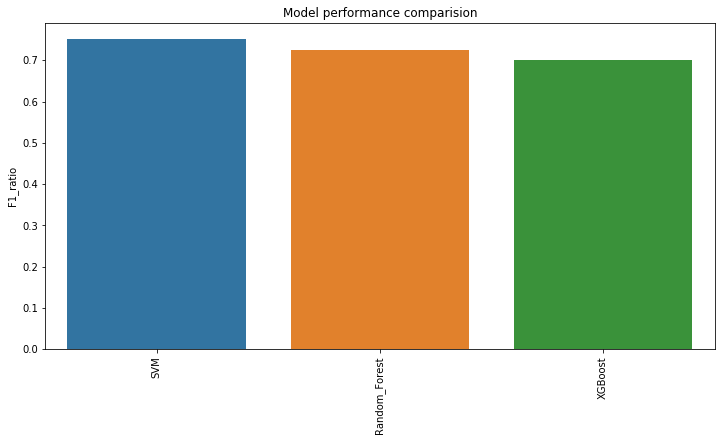

In [88]:
models = ['SVM', 'Random_Forest', 'XGBoost']
F1_ratio = [f1_score_svm, f1_score_rf, f1_score_xgb]

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=models, y=F1_ratio, ax=ax)
plt.xticks(rotation=90)
plt.title("Model performance comparision")
plt.ylabel("F1_ratio")
plt.show()

# Precision score

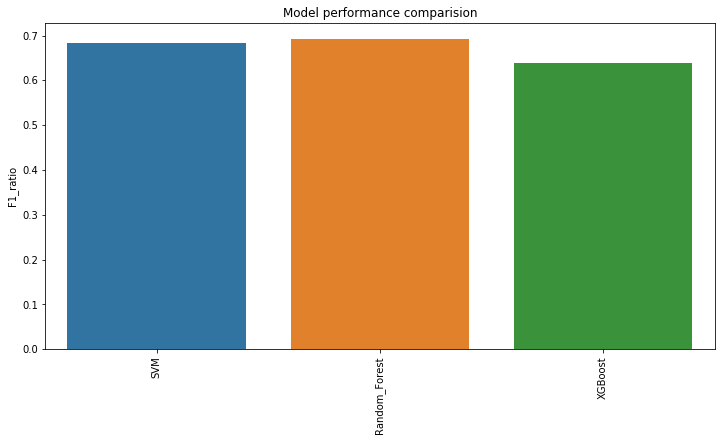

In [89]:
models = ['SVM', 'Random_Forest', 'XGBoost']
precision = [precision_svm, precision_rf, precision_xgb]

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=models, y=precision, ax=ax)
plt.xticks(rotation=90)
plt.title("Model performance comparision")
plt.ylabel("F1_ratio")
plt.show()

# Recall score

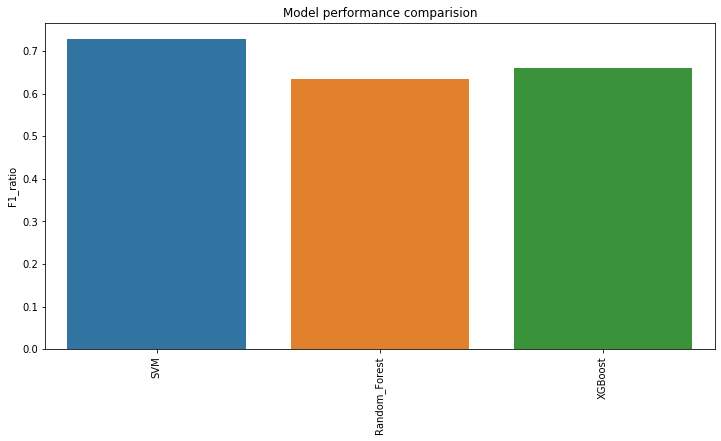

In [90]:
models = ['SVM', 'Random_Forest', 'XGBoost']
recall = [recall_svm, recall_rf, recall_xgb]

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=models, y=recall, ax=ax)
plt.xticks(rotation=90)
plt.title("Model performance comparision")
plt.ylabel("F1_ratio")
plt.show()

# Used joblib to save the SVM model for reusability 

In [91]:
from sklearn.externals import joblib

SVM_model_path = '/Users/angelali/Desktop/Kaggle projects/disaster tweet prediction/SVM_model.pkl'
joblib.dump(svm_linear_model, SVM_model_path)

['/Users/angelali/Desktop/Kaggle projects/disaster tweet prediction/SVM_model.pkl']

In [93]:
model = joblib.load(SVM_model_path) 

print('predicted value', model.predict(X_test_svm[0:20]))
print('ground truth', y_test[0:20])

predicted value [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
ground truth [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


# Finally built a pipeline that takes raw text data as input and outputs a prediction value